In [1]:
from scipy.cluster.hierarchy import dendrogram, linkage
import pandas as pd

In [2]:
time_table = pd.read_excel('PT_index.xlsx',header=1, usecols='B,C')

In [3]:
time_table.head()

,PT Index,Popular times
0,1,6am - 7 am
1,2,7am - 8 am
2,3,8 am - 9 am
3,4,9am - 10am
4,5,10am - 12 noon


In [4]:
HB_table = pd.read_excel('HB_index.xlsx',header=1, usecols='B,C')
HB_table.head()

,HOT Beverages,Index
0,CoffeeType,1
1,Café Latte,2
2,Café Mocha,3
3,Cappuccino,4
4,Caramel Macchiato,5


In [5]:
data = pd.read_excel("starbucks_surveys.xlsx",header=1, usecols="B,C")

In [6]:
data.head()

,PTIndex,HBIndex
0,1,5
1,1,7
2,2,6
3,2,9
4,3,6


In [7]:
data = pd.merge(data, time_table, 'left', left_on="PTIndex", right_on="PT Index")[["PTIndex","HBIndex","Popular times"]]

In [8]:
data = pd.merge(data, HB_table, 'left', left_on="HBIndex", right_on="Index")[["PTIndex","HBIndex","Popular times", "HOT Beverages"]]

In [9]:
data.head()

,PTIndex,HBIndex,Popular times,HOT Beverages
0,1,5,6am - 7 am,Caramel Macchiato
1,1,7,6am - 7 am,Hot Chocolate
2,2,6,7am - 8 am,Café Americano
3,2,9,7am - 8 am,Coffee Of the Day
4,3,6,8 am - 9 am,Café Americano


In [10]:
x = data.iloc[:,:2].values

In [11]:
x

array([[1, 5],
       [1, 7],
       [2, 6],
       [2, 9],
       [3, 6],
       [3, 8],
       [3, 8],
       [3, 9],
       [4, 8],
       [4, 8],
       [3, 3],
       [5, 4],
       [7, 2],
       [5, 7],
       [4, 5],
       [6, 9],
       [7, 3],
       [7, 9],
       [8, 1],
       [8, 7]])

In [12]:
# this label will help to find time clusters. Later we'll chose another label to find beverage clusters
labels = data.iloc[:,-2].values

In [13]:
labels

array(['6am - 7 am', '6am - 7 am', '7am - 8 am', '7am - 8 am',
       '8 am - 9 am', '8 am - 9 am', '8 am - 9 am', '8 am - 9 am',
       '9am - 10am', '9am - 10am', '8 am - 9 am', '10am - 12 noon',
       '1:00 pm - 3:00 pm', '10am - 12 noon', '9am - 10am',
       '12:00 - 1:00 pm', '1:00 pm - 3:00 pm', '1:00 pm - 3:00 pm',
       '3:00 pm - 4:00 pm', '3:00 pm - 4:00 pm'], dtype=object)

In [14]:
# use single linkage agglormerative clustering
Z1 = linkage(x, method='single')

{'icoord': [[25.0, 25.0, 35.0, 35.0],
  [15.0, 15.0, 30.0, 30.0],
  [45.0, 45.0, 55.0, 55.0],
  [115.0, 115.0, 125.0, 125.0],
  [105.0, 105.0, 120.0, 120.0],
  [95.0, 95.0, 112.5, 112.5],
  [85.0, 85.0, 103.75, 103.75],
  [75.0, 75.0, 94.375, 94.375],
  [145.0, 145.0, 155.0, 155.0],
  [185.0, 185.0, 195.0, 195.0],
  [175.0, 175.0, 190.0, 190.0],
  [165.0, 165.0, 182.5, 182.5],
  [150.0, 150.0, 173.75, 173.75],
  [135.0, 135.0, 161.875, 161.875],
  [84.6875, 84.6875, 148.4375, 148.4375],
  [65.0, 65.0, 116.5625, 116.5625],
  [50.0, 50.0, 90.78125, 90.78125],
  [22.5, 22.5, 70.390625, 70.390625],
  [5.0, 5.0, 46.4453125, 46.4453125]],
 'dcoord': [[0.0, 1.0, 1.0, 0.0],
  [0.0, 1.4142135623730951, 1.4142135623730951, 1.0],
  [0.0, 1.0, 1.0, 0.0],
  [0.0, 1.0, 1.0, 0.0],
  [0.0, 1.4142135623730951, 1.4142135623730951, 1.0],
  [0.0, 1.4142135623730951, 1.4142135623730951, 1.4142135623730951],
  [0.0, 1.4142135623730951, 1.4142135623730951, 1.4142135623730951],
  [0.0, 1.4142135623730951, 1.4

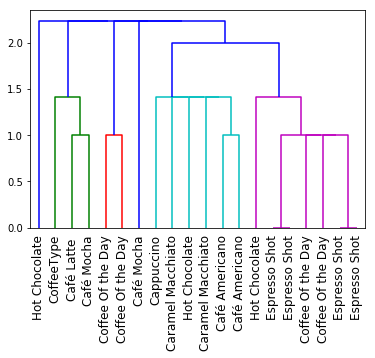

In [22]:
dendrogram(Z1, labels=labels, distance_sort=True, leaf_rotation=90) 

{'icoord': [[15.0, 15.0, 25.0, 25.0],
  [5.0, 5.0, 20.0, 20.0],
  [45.0, 45.0, 55.0, 55.0],
  [35.0, 35.0, 50.0, 50.0],
  [75.0, 75.0, 85.0, 85.0],
  [65.0, 65.0, 80.0, 80.0],
  [115.0, 115.0, 125.0, 125.0],
  [105.0, 105.0, 120.0, 120.0],
  [95.0, 95.0, 112.5, 112.5],
  [145.0, 145.0, 155.0, 155.0],
  [165.0, 165.0, 175.0, 175.0],
  [185.0, 185.0, 195.0, 195.0],
  [170.0, 170.0, 190.0, 190.0],
  [150.0, 150.0, 180.0, 180.0],
  [135.0, 135.0, 165.0, 165.0],
  [103.75, 103.75, 150.0, 150.0],
  [72.5, 72.5, 126.875, 126.875],
  [42.5, 42.5, 99.6875, 99.6875],
  [12.5, 12.5, 71.09375, 71.09375]],
 'dcoord': [[0.0, 1.0, 1.0, 0.0],
  [0.0, 1.8251407699364424, 1.8251407699364424, 1.0],
  [0.0, 1.0, 1.0, 0.0],
  [0.0, 2.53224755112299, 2.53224755112299, 1.0],
  [0.0, 1.4142135623730951, 1.4142135623730951, 0.0],
  [0.0, 2.23606797749979, 2.23606797749979, 1.4142135623730951],
  [0.0, 1.0, 1.0, 0.0],
  [0.0, 1.8251407699364424, 1.8251407699364424, 1.0],
  [0.0, 1.8834271799576283, 1.8834271799

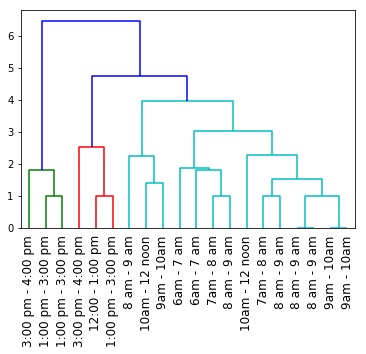

In [16]:
# use average linkage agglormerative clustering
Z2 = linkage(x, method='average')
dendrogram(Z2, labels=labels, distance_sort=True, leaf_rotation=90) 

{'icoord': [[15.0, 15.0, 25.0, 25.0],
  [5.0, 5.0, 20.0, 20.0],
  [45.0, 45.0, 55.0, 55.0],
  [35.0, 35.0, 50.0, 50.0],
  [12.5, 12.5, 42.5, 42.5],
  [85.0, 85.0, 95.0, 95.0],
  [75.0, 75.0, 90.0, 90.0],
  [65.0, 65.0, 82.5, 82.5],
  [105.0, 105.0, 115.0, 115.0],
  [125.0, 125.0, 135.0, 135.0],
  [110.0, 110.0, 130.0, 130.0],
  [145.0, 145.0, 155.0, 155.0],
  [165.0, 165.0, 175.0, 175.0],
  [185.0, 185.0, 195.0, 195.0],
  [170.0, 170.0, 190.0, 190.0],
  [150.0, 150.0, 180.0, 180.0],
  [120.0, 120.0, 165.0, 165.0],
  [73.75, 73.75, 142.5, 142.5],
  [27.5, 27.5, 108.125, 108.125]],
 'dcoord': [[0.0, 1.4142135623730951, 1.4142135623730951, 0.0],
  [0.0, 2.23606797749979, 2.23606797749979, 1.4142135623730951],
  [0.0, 1.0, 1.0, 0.0],
  [0.0, 2.23606797749979, 2.23606797749979, 1.0],
  [2.23606797749979, 5.656854249492381, 5.656854249492381, 2.23606797749979],
  [0.0, 1.0, 1.0, 0.0],
  [0.0, 2.8284271247461903, 2.8284271247461903, 1.0],
  [0.0, 3.0, 3.0, 2.8284271247461903],
  [0.0, 1.0, 1.

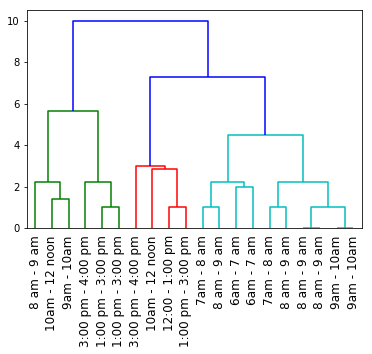

In [17]:
# use complete linkage agglormerative clustering
Z3 = linkage(x, method='complete')
dendrogram(Z3, labels=labels, distance_sort=True, leaf_rotation=90) 

From the three agg clustering methods we can see that the average linkage method gives the best clustering because customers are clustered mostly by time sections. There are more customers at the store between 6am to 12pm.

In [18]:
# Now let's try to cluster again using hot beverage type as the labels
labels = data.iloc[:,-1].values

{'icoord': [[25.0, 25.0, 35.0, 35.0],
  [15.0, 15.0, 30.0, 30.0],
  [45.0, 45.0, 55.0, 55.0],
  [115.0, 115.0, 125.0, 125.0],
  [105.0, 105.0, 120.0, 120.0],
  [95.0, 95.0, 112.5, 112.5],
  [85.0, 85.0, 103.75, 103.75],
  [75.0, 75.0, 94.375, 94.375],
  [145.0, 145.0, 155.0, 155.0],
  [185.0, 185.0, 195.0, 195.0],
  [175.0, 175.0, 190.0, 190.0],
  [165.0, 165.0, 182.5, 182.5],
  [150.0, 150.0, 173.75, 173.75],
  [135.0, 135.0, 161.875, 161.875],
  [84.6875, 84.6875, 148.4375, 148.4375],
  [65.0, 65.0, 116.5625, 116.5625],
  [50.0, 50.0, 90.78125, 90.78125],
  [22.5, 22.5, 70.390625, 70.390625],
  [5.0, 5.0, 46.4453125, 46.4453125]],
 'dcoord': [[0.0, 1.0, 1.0, 0.0],
  [0.0, 1.4142135623730951, 1.4142135623730951, 1.0],
  [0.0, 1.0, 1.0, 0.0],
  [0.0, 1.0, 1.0, 0.0],
  [0.0, 1.4142135623730951, 1.4142135623730951, 1.0],
  [0.0, 1.4142135623730951, 1.4142135623730951, 1.4142135623730951],
  [0.0, 1.4142135623730951, 1.4142135623730951, 1.4142135623730951],
  [0.0, 1.4142135623730951, 1.4

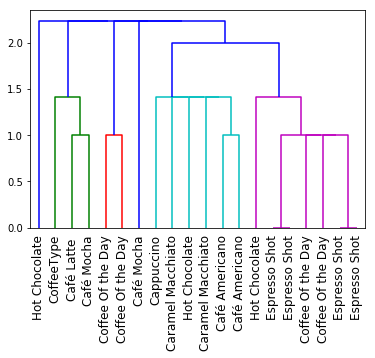

In [19]:
# use single linkage agglormerative clustering
Z4 = linkage(x, method='single')
dendrogram(Z4, labels=labels, distance_sort=True, leaf_rotation=90) 

{'icoord': [[15.0, 15.0, 25.0, 25.0],
  [5.0, 5.0, 20.0, 20.0],
  [45.0, 45.0, 55.0, 55.0],
  [35.0, 35.0, 50.0, 50.0],
  [75.0, 75.0, 85.0, 85.0],
  [65.0, 65.0, 80.0, 80.0],
  [115.0, 115.0, 125.0, 125.0],
  [105.0, 105.0, 120.0, 120.0],
  [95.0, 95.0, 112.5, 112.5],
  [145.0, 145.0, 155.0, 155.0],
  [165.0, 165.0, 175.0, 175.0],
  [185.0, 185.0, 195.0, 195.0],
  [170.0, 170.0, 190.0, 190.0],
  [150.0, 150.0, 180.0, 180.0],
  [135.0, 135.0, 165.0, 165.0],
  [103.75, 103.75, 150.0, 150.0],
  [72.5, 72.5, 126.875, 126.875],
  [42.5, 42.5, 99.6875, 99.6875],
  [12.5, 12.5, 71.09375, 71.09375]],
 'dcoord': [[0.0, 1.0, 1.0, 0.0],
  [0.0, 1.8251407699364424, 1.8251407699364424, 1.0],
  [0.0, 1.0, 1.0, 0.0],
  [0.0, 2.53224755112299, 2.53224755112299, 1.0],
  [0.0, 1.4142135623730951, 1.4142135623730951, 0.0],
  [0.0, 2.23606797749979, 2.23606797749979, 1.4142135623730951],
  [0.0, 1.0, 1.0, 0.0],
  [0.0, 1.8251407699364424, 1.8251407699364424, 1.0],
  [0.0, 1.8834271799576283, 1.8834271799

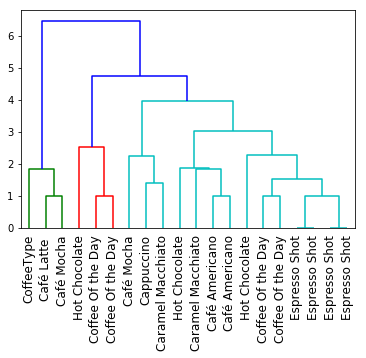

In [20]:
# use average linkage agglormerative clustering
Z5 = linkage(x, method='average')
dendrogram(Z5, labels=labels, distance_sort=True, leaf_rotation=90) 

{'icoord': [[15.0, 15.0, 25.0, 25.0],
  [5.0, 5.0, 20.0, 20.0],
  [45.0, 45.0, 55.0, 55.0],
  [35.0, 35.0, 50.0, 50.0],
  [12.5, 12.5, 42.5, 42.5],
  [85.0, 85.0, 95.0, 95.0],
  [75.0, 75.0, 90.0, 90.0],
  [65.0, 65.0, 82.5, 82.5],
  [105.0, 105.0, 115.0, 115.0],
  [125.0, 125.0, 135.0, 135.0],
  [110.0, 110.0, 130.0, 130.0],
  [145.0, 145.0, 155.0, 155.0],
  [165.0, 165.0, 175.0, 175.0],
  [185.0, 185.0, 195.0, 195.0],
  [170.0, 170.0, 190.0, 190.0],
  [150.0, 150.0, 180.0, 180.0],
  [120.0, 120.0, 165.0, 165.0],
  [73.75, 73.75, 142.5, 142.5],
  [27.5, 27.5, 108.125, 108.125]],
 'dcoord': [[0.0, 1.4142135623730951, 1.4142135623730951, 0.0],
  [0.0, 2.23606797749979, 2.23606797749979, 1.4142135623730951],
  [0.0, 1.0, 1.0, 0.0],
  [0.0, 2.23606797749979, 2.23606797749979, 1.0],
  [2.23606797749979, 5.656854249492381, 5.656854249492381, 2.23606797749979],
  [0.0, 1.0, 1.0, 0.0],
  [0.0, 2.8284271247461903, 2.8284271247461903, 1.0],
  [0.0, 3.0, 3.0, 2.8284271247461903],
  [0.0, 1.0, 1.

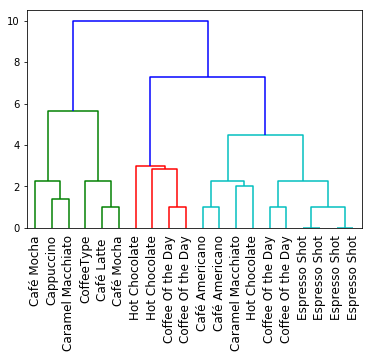

In [21]:
# use complete linkage agglormerative clustering
Z6 = linkage(x, method='complete')
dendrogram(Z6, labels=labels, distance_sort=True, leaf_rotation=90) 

From the clustering above using hot beverage type as the label we can see that there are no obvious trends or clusters indicating which hot beverage type or types are favored.

Based on the analysis, it is suggested coupons should be sent out in store during 6am to 12pm to reward loyal customers and boost sales. Specific coupons for certain types of hot beverages are not necessary.